In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json('../data/database-27-10.json')

#### Filter die Artikel nach: Sind zwischen dem und dem Datum veröffentlich worden.

In [2]:
df = df.loc[(df['date'] >= "2022-07-16") & (df['date'] <= "2022-10-27")]

#### Füge vier neue Features hinzu: Tag, Woche, Monat, Jahr

In [3]:
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

## Gruppiere die Artikel nach: Tag

In [4]:
df = df.groupby(["day", "month", "year"]).size().reset_index(name="amount")
df['date'] = pd.to_datetime(df[["year", "month", "day"]])
df.drop(["day", "month", "year"], axis=1, inplace=True)

#### Sortiere die Artikel nach: Datum

In [5]:
df = df.sort_values('date', ascending=True)

## Erstelle das Diagramm

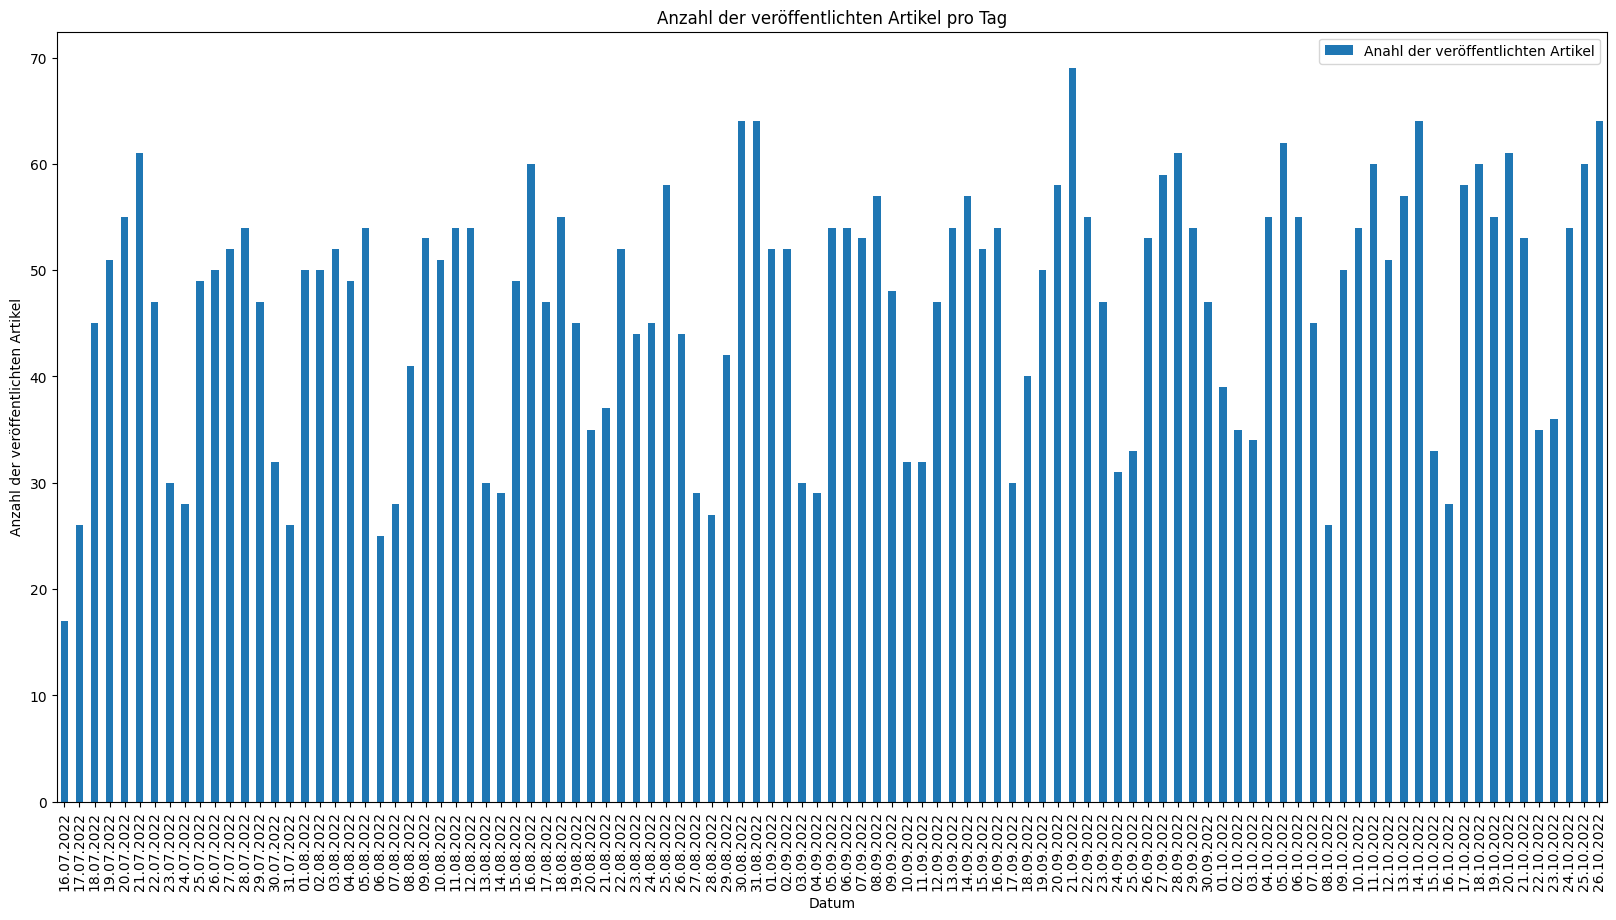

In [6]:
ax = df.plot(kind='bar', label="Anahl der veröffentlichten Artikel", x='date', y='amount', figsize=(20, 10))

ax.set_xticklabels(df['date'].dt.strftime('%d.%m.%Y'))
ax.set_title("Anzahl der veröffentlichten Artikel pro Tag")
ax.set_xlabel("Datum")
ax.set_ylabel("Anzahl der veröffentlichten Artikel")

ax.tick_params(axis='both', which='minor', labelsize=6)

ax.get_figure().savefig('figures/bar-amount-per-day.png', bbox_inches="tight")

plt.show()